### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [41]:
#Sampled 10 random rows to conduct preliminary analysis. 
data.sample(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5248,Home,Alone,Sunny,80,6PM,Coffee House,1d,Female,26,Unmarried partner,...,less1,1~3,less1,never,1,0,0,1,0,0
11838,Home,Partner,Sunny,30,6PM,Restaurant(<20),1d,Female,50plus,Widowed,...,less1,4~8,1~3,less1,1,1,1,0,1,1
6547,Home,Alone,Sunny,55,10PM,Carry out & Take away,1d,Female,50plus,Divorced,...,1~3,less1,4~8,less1,1,1,1,0,1,1
8636,No Urgent Place,Partner,Sunny,30,10AM,Bar,1d,Female,26,Married partner,...,less1,NaN,less1,less1,1,1,0,0,1,0
2217,No Urgent Place,Partner,Sunny,80,6PM,Bar,1d,Male,36,Married partner,...,never,4~8,4~8,1~3,1,1,0,0,1,1
12079,Home,Alone,Rainy,55,10PM,Coffee House,2h,Female,46,Married partner,...,4~8,4~8,1~3,NaN,1,0,0,1,0,1
8981,No Urgent Place,Alone,Rainy,55,10AM,Coffee House,1d,Female,46,Married partner,...,less1,1~3,1~3,never,1,1,0,0,1,1
11804,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,36,Married partner,...,less1,4~8,1~3,less1,1,1,0,0,1,0
6497,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),2h,Male,36,Unmarried partner,...,4~8,4~8,1~3,1~3,1,1,0,0,1,1
6331,Home,Alone,Sunny,80,6PM,Coffee House,1d,Female,36,Divorced,...,gt8,gt8,gt8,1~3,1,0,0,1,0,0


2. Investigate the dataset for missing or problematic data.

In [4]:
# initial exploration and check for missing values on each column
data.info()
# found that several columns have missing data (e.g., car, Bar, CoffeHouse, CarryAway, RestaurantLessThan20, and Restaurant20To50)
# Looking specifically on the car column, only 108 out of 12684 rows have identified the brand/type of cars driven. My assumption
# is that there is insufficient data or something is wrong during data preparation. The car column will be removed.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [5]:
# check for missing values in the columns
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [7]:
#Pick certain columns and investigate the tpe of data and to display unique values and counts for the column

print(data['temperature'].value_counts(dropna=False))

80    6528
55    3840
30    2316
Name: temperature, dtype: int64


In [8]:
print(data['time'].value_counts(dropna=False))

6PM     3230
7AM     3164
10AM    2275
2PM     2009
10PM    2006
Name: time, dtype: int64


In [36]:
print(data['income'].value_counts(dropna=False))

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64


In [9]:
print(data['coupon'].value_counts(dropna=False))

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64


In [10]:
data['car'].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [11]:
print(data['car'].value_counts(dropna=False))

NaN                                         12576
Scooter and motorcycle                         22
Mazda5                                         22
do not drive                                   22
crossover                                      21
Car that is too old to install Onstar :D       21
Name: car, dtype: int64


In [14]:
print(data['CoffeeHouse'].value_counts(dropna=False))

less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
NaN       217
Name: CoffeeHouse, dtype: int64


In [17]:
data[data['Restaurant20To50'].isnull()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
517,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
518,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
519,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(<20),1d,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,1,0,0,1,1
520,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,0
521,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,2h,Male,50plus,Divorced,...,NaN,NaN,NaN,NaN,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12300,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,0,0,0,1,1
12301,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,0,0,1,0,1
12302,Work,Alone,Snowy,30,7AM,Restaurant(<20),1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,1,0,0,1,0
12303,Work,Alone,Snowy,30,7AM,Bar,1d,Female,50plus,Widowed,...,never,4~8,1~3,NaN,1,1,1,0,1,0


3. Decide what to do about your missing data -- drop, replace, other...

In [47]:
#First I decided to drop the Car column because there is less than 1% drove the car. 
adjust_data = data.drop(columns=['car'])

In [48]:
# check for missing values in the columns
print(data.isnull().sum())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [62]:
#First I decided to drop the Car column because there is less than 1% drove the car.
#Second, I dropped any rows that has NaN values. Noted that the column car is dropped from previous line and named the new dataframe adjust_data.

adjust_data = data.drop(columns=['car'])
adjust_data = adjust_data.dropna(subset=['CarryAway', 'CoffeeHouse', 'Bar', 'RestaurantLessThan20', 'Restaurant20To50'])
adjust_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

4. What proportion of the total observations chose to accept the coupon? 

In [55]:
#I calculated the proportion of the total observations chose to accept the coupon [1] from the adjust_data, which has total of 12079 rows. 

print(adjust_data['Y'].value_counts(dropna=False))

1    6877
0    5202
Name: Y, dtype: int64


In [57]:
#Calculate the proportion based on the data above: 

print(adjust_data[adjust_data['Y'] == 1].size / adjust_data.size)

0.5693352098683666


5. Use a bar plot to visualize the `coupon` column.

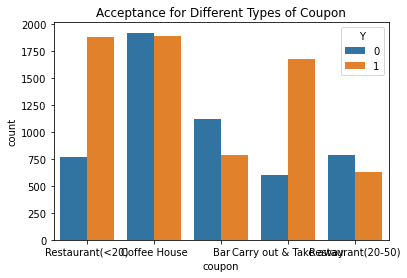

In [248]:
sns.countplot(data = df, x="coupon", alpha = 1, hue='Y').set_title('Acceptance for Different Types of Coupon')
plt.savefig('images/coupon_barplot.png')

6. Use a histogram to visualize the temperature column.

In [32]:
temp_1 = px.histogram(data, x = "temperature",  nbins=50, title='Temperature Distribution')
temp_1.update_layout(
    xaxis_title='Temperature',
    yaxis_title='Count',
    template='plotly_white'
)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [124]:
bar_df = adjust_data[adjust_data['coupon'] == 'Bar']
bar_df.info()
bar_df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   object
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   object
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null 

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
11691,No Urgent Place,Kid(s),Snowy,30,6PM,Bar,1d,Female,50plus,Married partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,0
2511,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,never,1,1,1,0,1,1
941,Work,Alone,Sunny,55,7AM,Bar,1d,Female,31,Single,...,4~8,4~8,4~8,4~8,1,1,1,0,1,1
11465,Home,Partner,Sunny,30,10PM,Bar,2h,Female,41,Married partner,...,gt8,gt8,gt8,4~8,1,1,1,0,1,0
276,Work,Alone,Sunny,55,7AM,Bar,1d,Female,31,Married partner,...,less1,1~3,less1,less1,1,1,1,0,1,0
5536,Home,Alone,Sunny,80,10PM,Bar,1d,Female,50plus,Single,...,less1,less1,less1,1~3,1,1,0,1,0,0
9802,Home,Alone,Rainy,55,6PM,Bar,1d,Male,46,Married partner,...,less1,4~8,1~3,less1,1,1,1,0,1,0
8982,No Urgent Place,Alone,Snowy,30,2PM,Bar,1d,Female,46,Married partner,...,less1,1~3,1~3,never,1,0,0,0,1,0
3087,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Single,...,gt8,gt8,gt8,gt8,1,1,1,0,1,1
12566,Work,Alone,Snowy,30,7AM,Bar,1d,Female,26,Married partner,...,less1,1~3,1~3,never,1,1,1,0,1,0


In [73]:
print(bar_df['income'].value_counts(dropna=False))

$25000 - $37499     300
$100000 or More     282
$12500 - $24999     271
$50000 - $62499     249
$37500 - $49999     247
Less than $12500    159
$75000 - $87499     143
$87500 - $99999     133
$62500 - $74999     129
Name: income, dtype: int64


In [75]:
print(bar_df['maritalStatus'].value_counts(dropna=False))

Married partner      833
Single               638
Unmarried partner    352
Divorced              73
Widowed               17
Name: maritalStatus, dtype: int64


2. What proportion of bar coupons were accepted?


In [71]:
#Showing the new data frame, bar_df, which has a total of 1913 rows. 

print(bar_df['Y'].value_counts())

0    1125
1     788
Name: Y, dtype: int64


In [72]:
#I calculated the proportion of bar coupons accepted based on the data above: 

print(bar_df[bar_df['Y'] == 1].size / bar_df.size)

0.41191845269210664


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [78]:
print(bar_df['Bar'].value_counts(dropna=False))

never    788
less1    553
1~3      379
4~8      147
gt8       46
Name: Bar, dtype: int64


In [82]:
#I created a list of string for all rows who went to a bar 3 or fewer times a month
bar_3_or_fewer = ['never', 'less1', '1~3']

In [83]:
#Filter the dataframe for bar_3_or_fewer visits
new_bar_3_or_fewer = bar_df.query("Bar in @bar_3_or_fewer")

In [99]:
#Acceptance rate for customers who went to a bar 3 or fewer times a month
new_bar_3_or_fewer[new_bar_3_or_fewer['Y'] == 1].size / new_bar_3_or_fewer.size

0.37267441860465117

In [92]:
#Simiarly, I created a list of string for all rows who went to a bar more than a few times a month
bar_more_than_3 = ['4~8', 'gt8']

In [93]:
#Filter the dataframe for bar_3_or_more visits
new_bar_more_than_3 = bar_df.query("Bar in @bar_more_than_3")

In [101]:
#Acceptance rate for customers who went to a bar more than 3 times a month
new_bar_more_than_3[new_bar_more_than_3['Y'] == 1].size / new_bar_more_than_3.size

0.7688442211055276

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [139]:
#Something that I was not aware first as the dtype was object. I typed the following code snippets to change the dtype to "int" 
print(bar_df['age'].value_counts(dropna=False))
bar_df['age'] = bar_df['age'].astype(int)
bar_df.info()

21    397
26    368
31    324
51    273
36    196
41    171
46    103
20     81
Name: age, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   int64 
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-n

/var/folders/4r/c92kq07s3zzb92cj54wtnjc80000gn/T/ipykernel_91161/2919146082.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [136]:
#I replaced the two data categories from str to int
bar_df['age'] = bar_df['age'].replace('below21', '20')
bar_df['age'] = bar_df['age'].replace('50plus', '50')

/var/folders/4r/c92kq07s3zzb92cj54wtnjc80000gn/T/ipykernel_91161/2330297668.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/4r/c92kq07s3zzb92cj54wtnjc80000gn/T/ipykernel_91161/2330297668.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



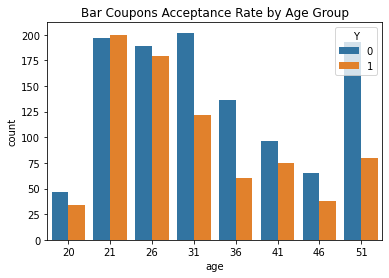

In [249]:
sns.countplot(data = bar_df, x="age", hue='Y').set_title('Bar Coupons Acceptance Rate by Age Group')
plt.savefig('images/coupon_acceptance_rate_by_age_barplot.png')

In [143]:
#I created a list of string for all rows who went to a bar more than once per month
bar_more_than_1 = ['1~3', '4~8', 'gt8']
#Then I filtered the query and include rows that are age 26 or older
bar_df_more_than_1 = bar_df.query('Bar in @bar_more_than_1 and age >= 26')

In [145]:
#Acceptance rate for customers who went to a bar 1 or more times a month plus age 26 or older
bar_df_more_than_1[bar_df_more_than_1['Y'] == 1].size / bar_df_more_than_1.size

0.6898263027295285

In [146]:
#I created a list of string for all rows who went less than one time or never go to the bar. 
bar_less_than_1 = ['never', 'less1']
#Then I filtered the query and include rows that are age less than 25
bar_less_than_1 = bar_df.query('Bar in @bar_less_than_1 and age < 25')

In [147]:
#Acceptance rate for customers who went to never go to the bar or less than one time per month plus less than age 25
bar_less_than_1[bar_less_than_1['Y'] == 1].size / bar_less_than_1.size

0.3883495145631068

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [150]:
bar_df = bar_df.rename(columns={'passanger': 'passenger'})
print(bar_df['passenger'].value_counts(dropna=False))

Alone        1141
Friend(s)     318
Partner       260
Kid(s)        194
Name: passenger, dtype: int64


In [151]:
print(bar_df['has_children'].value_counts(dropna=False))

0    1095
1     818
Name: has_children, dtype: int64


In [155]:
print(bar_df['occupation'].value_counts(dropna=False))

Unemployed                                   292
Student                                      237
Computer & Mathematical                      225
Sales & Related                              175
Education&Training&Library                   125
Management                                   108
Office & Administrative Support              101
Arts Design Entertainment Sports & Media      88
Business & Financial                          82
Retired                                       71
Healthcare Support                            44
Food Preparation & Serving Related            43
Community & Social Services                   40
Healthcare Practitioners & Technical          36
Transportation & Material Moving              35
Legal                                         34
Protective Service                            27
Architecture & Engineering                    27
Personal Care & Service                       25
Construction & Extraction                     24
Life Physical Social

In [180]:
#df_group_1
bar_more_than_1 = ['1~3', '4~8', 'gt8']
#df_group_2
passenger_not_kid = ['Alone','Friend(s)','Partner']
#df_group_3
occupation_farming = ['Farming Fishing & Forestry']
#noticed that occupation_farming will be added as variable but actual answer will be excluding this category. 

In [181]:
df_group_1 = bar_df.query('Bar in @bar_more_than_1')
#Acceptance rate for customers who went to the bar more than one time per month
df_group_1[df_group_1['Y'] == 1].size / df_group_1.size

0.6853146853146853

In [182]:
df_group_2 = bar_df.query('passenger in @passenger_not_kid')
#Acceptance rate for customers who went to the bar with passengers that were not a kid 
df_group_2[df_group_2['Y'] == 1].size / df_group_2.size

0.4351367073880163

In [183]:
df_group_3 = bar_df.query('occupation not in @occupation_farming')
#Acceptance rate for customers who had occupations other than farming, fishing, or forestry. 
df_group_3[df_group_3['Y'] == 1].size / df_group_3.size

0.4117647058823529

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [168]:
Not_widowed = bar_df.query('Bar in @bar_more_than_1 and passenger not in @passenger_not_kid and maritalStatus not in ["Widowed"]')
#Acceptance rate for customers who go to bars more than once a month, had passengers that were not a kid, and were not widowed 
Not_widowed[Not_widowed['Y'] == 1].size / Not_widowed.size

0.38095238095238093

In [179]:
age_under_30 = bar_df.query('Bar in @bar_more_than_1 and age<=30')
#Acceptance rate for customers who go to bars more than once a month and are under the age of 30
age_under_30[age_under_30['Y'] == 1].size / age_under_30.size

0.7195121951219512

In [185]:
Restaurants = ["4~8", "gt8"]
Income = ["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"]

cheap_restaurants = bar_df.query('RestaurantLessThan20 in @Restaurants and income in @Income')
#Acceptance rate for customers who go to cheap restaurants more than 4 times a month and income is less than 50K
cheap_restaurants[cheap_restaurants['Y'] == 1].size / cheap_restaurants.size

0.45645645645645644

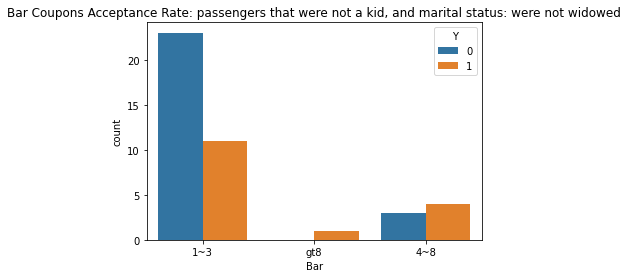

In [250]:
sns.countplot(data = Not_widowed, x="Bar", hue='Y'
).set_title('Bar Coupons Acceptance Rate: passengers that were not a kid, and marital status: were not widowed')
plt.savefig('images/coupon_acceptance_rate_passengers_not_kid_notwidowed_barplot.png')

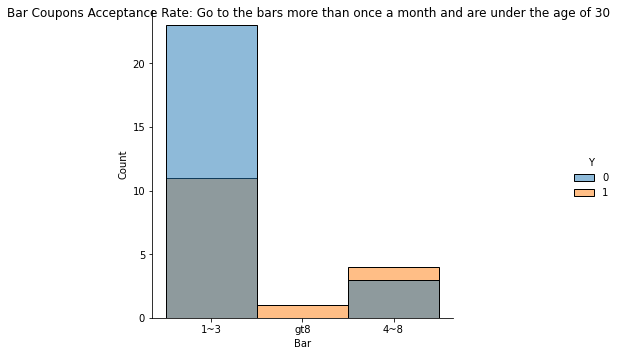

In [251]:
sns.displot(data = Not_widowed, x="Bar", hue='Y'
).fig.suptitle('Bar Coupons Acceptance Rate: Go to the bars more than once a month and are under the age of 30')
plt.savefig('images/coupon_acceptance_rate_bars_more_than_once_age_under30_barplot.png')

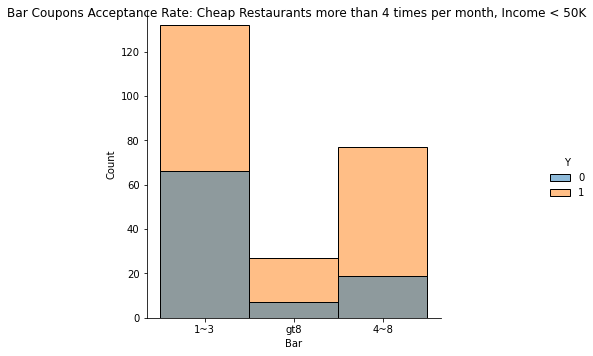

In [252]:
sns.displot(data = age_under_30, x="Bar", hue='Y'
).fig.suptitle('Bar Coupons Acceptance Rate: Cheap Restaurants more than 4 times per month, Income < 50K')
plt.savefig('images/coupon_acceptance_cheap_restaurants_income_below_50K_barplot.png')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the graphs created, these are the observations I have: 

1. it's evident that the acceptance rate for the bar coupons is higher among individuals who visit bars more frequently than individuals who visit only once a month or even less. 
2. Additional factors that enhance the likelihood of accepting bar coupons include being younger than 26 (comparing accepting vs. not accepting in the same category)
3. Acceptance rate for the bar coupons will be more likely for people who have passengers that are not kids, or he/she visits cheap restaurants more than four times a month with an income below $50,000.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

1. I would like to further explore and compare the acceptance rates among drivers who visit a bar more than once a month with varying educational backgrounds, and those who visit a bar less than once a month or never, also with varying educational backgrounds

In [215]:
print(bar_df['education'].value_counts(dropna=False))

Some college - no degree                  686
Bachelors degree                          631
Graduate degree (Masters or Doctorate)    262
Associates degree                         177
High School Graduate                      143
Some High School                           14
Name: education, dtype: int64


In [229]:
Bachelor_or_higher = ['Bachelors degree','Graduate degree (Masters or Doctorate)']
education_group_1 = bar_df.query('Bar in @bar_more_than_1 and education in @Bachelor_or_higher')

In [230]:
#Acceptance rate for customers who go to bars more than once a month and with a bachelor degree or higher
education_group_1[education_group_1['Y'] == 1].size / education_group_1.size

0.6510067114093959

In [231]:
education_group_2 = bar_df.query('Bar in @bar_more_than_1 and education not in @Bachelor_or_higher')

In [234]:
#Acceptance rate for customers who go to bars more than once a month and with associate degree or lower
education_group_2[education_group_2['Y'] == 1].size / education_group_2.size

0.7226277372262774

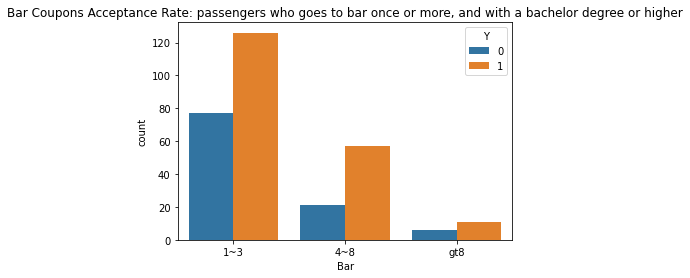

In [253]:
sns.countplot(data = education_group_1, x="Bar", hue='Y'
).set_title('Bar Coupons Acceptance Rate: passengers who goes to bar once or more, and with a bachelor degree or higher')
plt.savefig('images/coupon_acceptance_rate_bachelor_degree_or_higher.png')

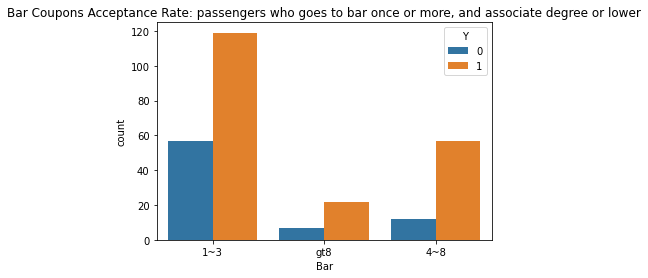

In [254]:
sns.countplot(data = education_group_2, x="Bar", hue='Y'
).set_title('Bar Coupons Acceptance Rate: passengers who goes to bar once or more, and associate degree or lower')
plt.savefig('images/coupon_acceptance_rate_associate_degree_or_lower.png')

Conclusion:

Based on the data above, in general, people would accept the bar coupons despite different educational background, or going to the bar with at least one or more times per month. 

Coupons acceptance rate for those who goes to the bar more than once per month and have a bachelor degree or higher: 0.6510067114093959
Coupons acceptance rate for those who goes to the bar more than once per month and have an associate degree or lower: 0.7226277372262774